In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon

In [38]:
# math functions

# inhibiting hill function
def inhibit_hill(x, K, n):
    return K**n / (K**n + x**n)

# activating hill function
def activate_hill(x, K, n):
    return x**n / (K**n + x**n)

In [159]:
#step functions

#check neighbors function
def check_neighbors(cell_locations, cell_colors, strength, self_effect, K_strength):

    new_colors = []
    colors_array = np.zeros((size, size))

    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        colors_array[x, y] = cell_colors[number]

    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        total_color=0

        for color in colors_array[x-2:x+3, y-1:y+2]:
            for x in color:
                total_color=total_color+x
        
        # calculate input signal
        input_signal=total_color - cell_colors[number]    # np.random.normal(1, 0.1)

        # change cis-inhibition strength
        input_signal=total_color - 3*cell_colors[number]
         
        # activate upstream promoter (KRAB)
        krab = activate_hill(input_signal, 6, n=2)
        input_signal = 6 * krab

        # inhibiting hill function
        inhi = inhibit_hill(input_signal, K_strength, n=4)

        # activating hill function
        acti = activate_hill(cell_colors[number], K_strength, n=4)

        new_color = cell_colors[number] * 0.1 + strength * inhi + self_effect + strength * acti

        if new_color < 0.01:
            new_color = 0.01 * random.random()

        new_colors.append(new_color)

    return new_colors

# Update cell locations
def cell_growth(cell_colors, cell_locations):
    new_locations = []
    new_colors=[]
    for number in range(0,len(cell_locations)):
        x,y = cell_locations[number]
        if random.random() < 0.5:
            new_locations.append((x, y))
            new_colors.append(cell_colors[number])
        else:
            flag=random.random()
            new_locations.append((x, y))
            new_colors.append(cell_colors[number])
            if flag < 0.166:
                if (x+1, y+1) not in cell_locations and x+1<size and y+1<size:
                    new_locations.append((x+1, y+1))
                    new_colors.append(cell_colors[number])
            elif flag < 0.333:
                if (x-1, y+1) not in cell_locations and x-1>0 and y+1<size:
                    new_locations.append((x-1, y+1))
                    new_colors.append(cell_colors[number])
            elif flag < 0.5:
                if (x-2, y) not in cell_locations and x-2>0:
                    new_locations.append((x-2, y))
                    new_colors.append(cell_colors[number])
            elif flag < 0.666:
                if (x-1, y-1) not in cell_locations and x-1>0 and y-1>0:
                    new_locations.append((x-1, y-1))
                    new_colors.append(cell_colors[number])
            elif flag < 0.833:
                if (x+2, y) not in cell_locations and  x+2<size:
                    new_locations.append((x+2, y))
                    new_colors.append(cell_colors[number])
            else:
                if (x+1, y-1) not in cell_locations and x+1<size and y-1>0:
                    new_locations.append((x+1, y-1))
                    new_colors.append(cell_colors[number])

    return new_colors, new_locations


#用六边形显示

# 创建绘制六边形的函数
def hexagon(x, y, size, color):
    side_length = 0.5 * size / np.cos(np.pi / 6)
    hexagon = RegularPolygon((x, y), numVertices=6, radius=side_length, color=color,orientation=1)
    return hexagon

# 创建绘图对象
def hexa_plot(cell_locations, cell_colors, threshold):
    fig, ax = plt.subplots()

    i=0
    for x,y in cell_locations:
        ccolor='green' if cell_colors[i]>threshold else 'yellow'
        #print(ccolor)
        hexagon_patch = hexagon(x, y*2, size=1.5, color=ccolor)
        ax.add_patch(hexagon_patch)
        i=i+1

    # 设置图像范围和坐标轴
    ax.set_xlim([0, size])
    ax.set_ylim([0, size*2])
    ax.set_aspect('equal')
    ax.axis('off')

    #plt.title('Cell differentiation')
    plt.show()


In [9]:
# growth and chech neighbors control

def go_simu(cell_colors,cell_locations,grow_step,check_step,strength, self_effect,threshold, K_strength):

    cc_stdm = []
    cc_mean = []

    for i in range(grow_step):

        for j in range(check_step):
            cell_colors = check_neighbors(cell_locations, cell_colors, strength, self_effect, K_strength)
            cc_stdm.append(np.std(cell_colors))
            cc_mean.append(np.mean(cell_colors))
            
        cell_colors, cell_locations = cell_growth(cell_colors, cell_locations)
    hexa_plot(cell_locations, cell_colors, threshold)

    # plot the standard deviation of cell colors
    plt.plot(cc_stdm)
    plt.title("Standard deviation of expression")
    plt.show()

    # plot the mean of cell colors
    plt.plot(cc_mean)
    plt.title("Mean of expression")
    plt.show()

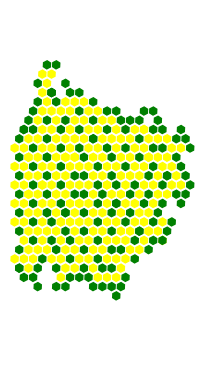

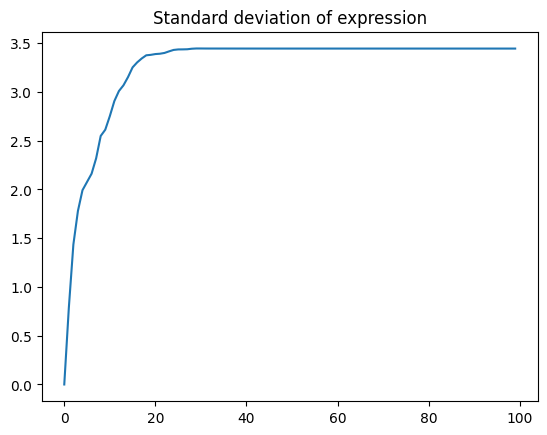

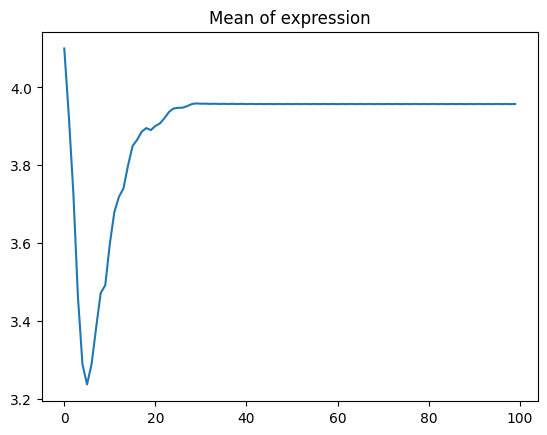

In [162]:
# initialize the grid
size = 40  # size of the grid
cell_locations = [(size//2, size//2)]  # start with one cell at the center
cell_colors = [0] # initial color of the cell

for j in range(40):
    cell_colors,cell_locations=cell_growth(cell_colors, cell_locations)
2
go_simu(cell_colors,cell_locations,grow_step=1,check_step=100, strength=4, self_effect=0.1, threshold=4, K_strength=4)

In [11]:
for j in range(10):
    #cell_colors,cell_locations=cell_growth(cell_colors, cell_locations)
    for i in range(20):
        cell_colors=check_neighbors(cell_locations, cell_colors, strength=0.01, self_effect=0.1)

hexa_plot(cell_locations, cell_colors,threshold=0.1)

TypeError: check_neighbors() missing 1 required positional argument: 'K_strength'

In [ ]:
def neighbors(test, size):
    neighbors = []
    for i in range(size):
        for j in range(size):
            if i in range(1,size-1):
                if j in range(1, size-1):
                    neighbors.append(test[i-1:i+2, j-1:j+2])
                else:
                    if j==0:
                        neighbors.append(test[i-1:i+2, j:j+2])
                    else:
                        neighbors.append(test[i-1:i+2, j-1:j+1])
            else:
                if i==0:
                    if j in range(1, size-1):
                        neighbors.append(test[i:i+2, j-1:j+2])
                    else:
                        if j==0:
                            neighbors.append(test[i:i+2, j:j+2])
                        else:
                            neighbors.append(test[i:i+2, j-1:j+1])
                else:
                    if j in range(1, size-1):
                        neighbors.append(test[i-1:i+1, j-1:j+2])
                    else:
                        if j==0:
                            neighbors.append(test[i-1:i+1, j:j+2])
                        else:
                            neighbors.append(test[i-1:i+1, j-1:j+1])
    return neighbors

In [ ]:
size = 30
test = np.random.rand(size, size)

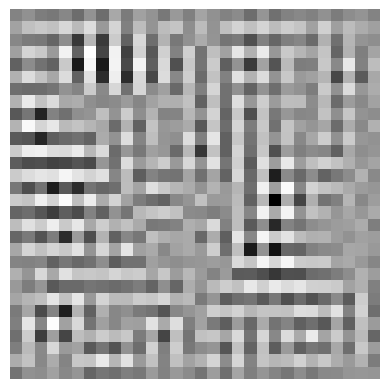

In [ ]:

for step in range(10):
    neighbors_list = neighbors(test, size)
    for i in range(size):
        for j in range(size):
            test[i, j] = test[i, j] - 0.1 * np.sum(neighbors_list[i*size+j]) + 0.2
    # plot test
fig, ax = plt.subplots()
ax.imshow(test, cmap='Greys', interpolation='nearest')
ax.set_aspect('equal')
ax.axis('off')
plt.show()